In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Pcdh

In [33]:
datasets = [
    "somatosensory_converted_into_tpm",
    "Dopaminergic_TPM_clean",
    "Rbp4_positive_cells"
]

In [34]:
ic_dfs = {x: pd.read_csv("{}/results/geomean/stage1_chr18_IC.csv".format(x)) for x in datasets}
chr18 = pd.read_csv("somatosensory_converted_into_tpm/intermediate/chr18_filtered.csv")

In [35]:
for k in datasets:
    ic_dfs[k].loc[:, "start_bp"] = chr18.loc[ic_dfs[k].start].reset_index().start

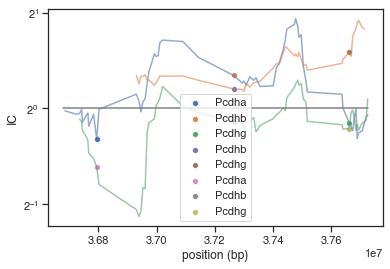

In [52]:
for x in datasets:
    ic_df = ic_dfs[x]
    ic_df = ic_df.loc[(ic_df.start >= 190) & (ic_df.start <= 250)]

    name = 18
    sns.set(context="notebook", style="ticks", font="Helvetica")
    start = ic_df.start_bp.min()
    end = ic_df.start_bp.max()
    stretch = 14
    sns.lineplot(data=ic_df[((ic_df.stretch - ic_df.n_genes) <= (2 / 7 * ic_df.stretch)) & (ic_df.stretch == stretch)], x='start_bp', y='ic', alpha=0.6, markers=True)#, label="Stretch 21")
    sns.scatterplot(data=ic_df[(ic_df.stretch == stretch) & (ic_df.start == 200)], x='start_bp', y='ic', label="Pcdha")
    sns.scatterplot(data=ic_df[(ic_df.stretch == stretch) & (ic_df.start == 216)], x='start_bp', y='ic', label="Pcdhb")
    sns.scatterplot(data=ic_df[(ic_df.stretch == stretch) & (ic_df.start == 240)], x='start_bp', y='ic', label="Pcdhg")
sns.lineplot([start,end],[1,1],color="grey")
plt.yscale("log", basey=2)
plt.ylabel("IC")
plt.xlabel("position (bp)")
plt.show()